In [2]:
import pyart, matplotlib.pyplot as plt

In [ ]:
#Uses code from https://arm-doe.github.io/pyart/examples/io/plot_nexrad_data_aws.html
#and https://arm-doe.github.io/pyart/notebooks/dealiasing_velocity.html (see report for citation)

In [ ]:
#Name of input file
filename = ("s3://noaa-nexrad-level2/2024/05/09/KBMX/KBMX20240509_135237_V06")
radar = pyart.io.read_nexrad_archive(filename)

#Dealias velocity, add corrected velocity field
velocity_dealiased = pyart.correct.dealias_region_based(radar, vel_field="velocity")
radar.add_field("corrected_velocity", velocity_dealiased, replace_existing=True)

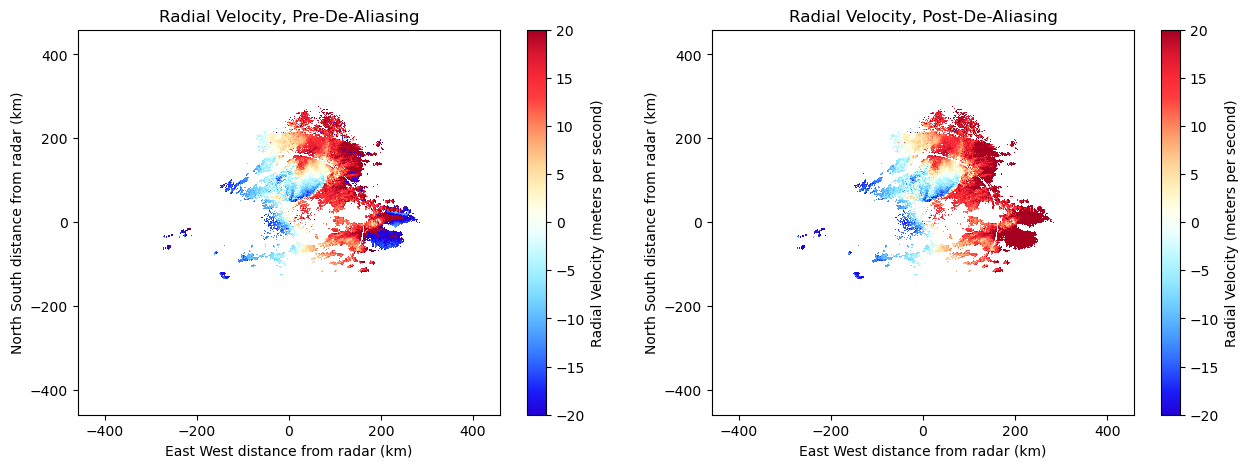

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

display = pyart.graph.RadarDisplay(radar)

#Plot PPI scans of pre and post-dealiased velocity
display.plot_ppi(
    "velocity",
    5,
    ax = ax[0],
    vmin = -20,
    vmax = 20,
    colorbar_label="Radial Velocity (meters per second)",
    title="Radial Velocity, Pre-De-Aliasing",
    gatefilter = None,
)

display.plot_ppi(
    "corrected_velocity",
    5,
    ax = ax[1],
    vmin = -20,
    vmax = 20,
    colorbar_label="Radial Velocity (meters per second)",
    title="Radial Velocity, Post-De-Aliasing",
    gatefilter = None,
)